** italicized textMNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
#loadin the MINIST dataset from Keras
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)
type(Y_train)
type(X_test)
type(Y_test)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images
Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [5]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


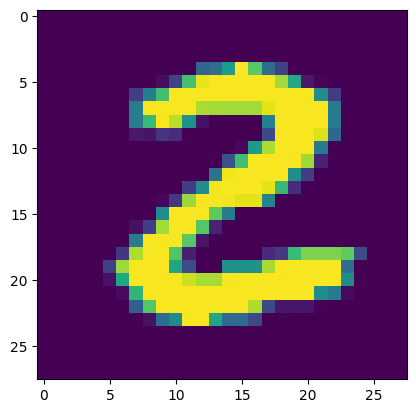

2


In [7]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [8]:
#checking the image lables
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
#we can se encoding or use the lables are they are also the images are in size all dimensions
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [11]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
#Buiding the neural network model using Tenserflow and Keras  python libraries

#setting up the 3 layer models of the neuron which are relu,relu and sigmoid
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [13]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=60)

Epoch 1/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0331 - accuracy: 0.9891
Epoch 2/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0301 - accuracy: 0.9899
Epoch 3/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0261 - accuracy: 0.9914
Epoch 4/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9922
Epoch 5/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0221 - accuracy: 0.9925
Epoch 6/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0204 - accuracy: 0.9929
Epoch 7/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0177 - accuracy: 0.9940
Epoch 8/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0177 - accuracy: 0.9936
Epoch 9/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 10/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.013

In [17]:
#the Training Accuracy Comes to 99%
loss, accuracy = model.evaluate(X_train, Y_train)
print(accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0075 - accuracy: 0.9974
0.9974333047866821


In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2423 - accuracy: 0.9748
0.9747999906539917


In [18]:
print(X_test.shape)

(10000, 28, 28)


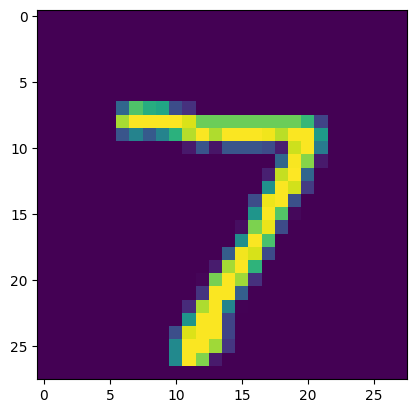

In [19]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [20]:
print(Y_test[0])

7


In [21]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
print(Y_pred.shape)

(10000, 10)


In [23]:
print(Y_pred[0])

[1.0254295e-04 1.8855837e-11 1.7190792e-03 9.9831051e-01 2.6047970e-24
 1.1578127e-06 6.7012656e-18 1.0000000e+00 1.2459566e-06 9.2358631e-01]


In [24]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [25]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 4, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 3, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 4, 5, 7, 8, 9, 3, 3, 4, 6, 4, 3, 0, 3, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 4, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 2, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 4, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 3, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 1, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 4, 7, 5, 9, 2, 6, 4, 1, 5, 8, 1, 9, 2, 0, 4, 0, 0, 2, 8, 4, 3, 1, 2, 4, 0, 1, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [26]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [27]:
print(conf_mat)

tf.Tensor(
[[ 961    0    0    2    4    2    2    0    6    3]
 [   0 1129    0    0    0    1    2    1    2    0]
 [   4  118  899    1    3    0    2    1    4    0]
 [   0   23   15  960    1    3    0    2    4    2]
 [   0    0    5    0  968    0    5    0    0    4]
 [   2    0    0  114    2  760    6    1    5    2]
 [   8    3    4    2    5   22  910    0    4    0]
 [   3    5   52   48    2    0    0  908    5    5]
 [   4    2   13   24    8    7    0    4  910    2]
 [   4    2    0   11   86    3    0   22   13  868]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

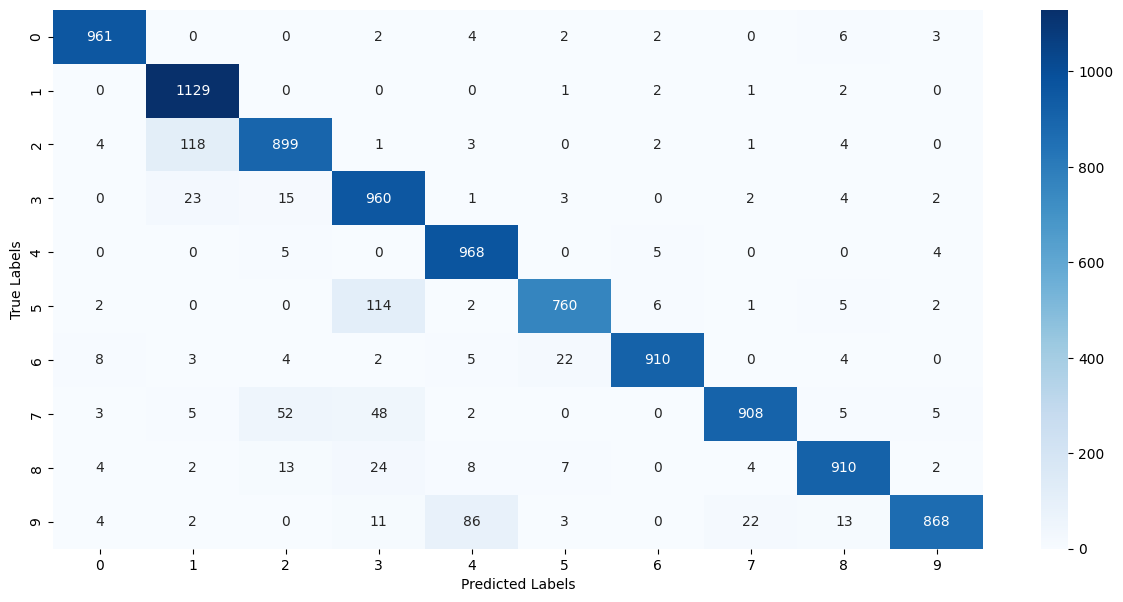

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')